# 이상값 탐색 및 처리 실습

# 1. 필요 라이브러리 import

In [24]:
import random
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

import os
if os.name == 'nt' : 
    font_family = "Malgun Gothic"
else: 
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

# 2. Z검정을 이용한 이상값 처리

1) 데이터 생성

In [25]:
np_data = np.random.randint(1, 100, size = 3000)
data = list(np_data)

In [26]:
data[0:2]

[74, 66]

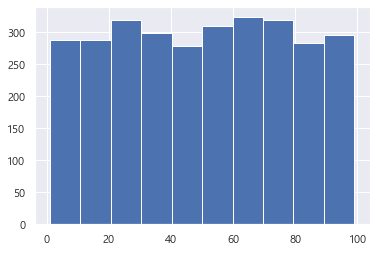

In [27]:
plt.hist(data)
plt.show()

In [28]:
data_mean = np.mean(data)
data_std = np.std(data)

print(data_mean)
print(data_std)

50.215
28.32592643380501


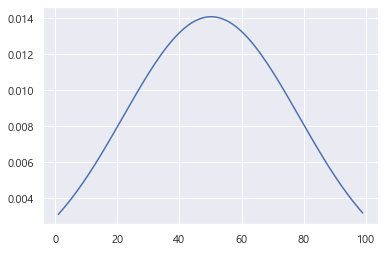

In [29]:
pdf = stats.norm.pdf(np.sort(data), data_mean, data_std)

plt.figure()
plt.plot(np.sort(data), pdf)

In [30]:
std_list = []

for i in data :
    z = (i - data_mean) / data_std
    std_list.append(z)

-1.2079226507921704e-16
1.0


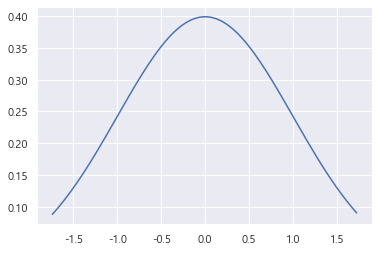

In [31]:
ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(std_list),
         ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(std_list), ol_pdf)

2) 데이터셋에 이상값 추가

In [32]:
ol_data = data.copy()
ol_no = 10

for i in range(ol_no):
    rand_no = random.randint(0, len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2)

50.45215946843854
28.6835270015791


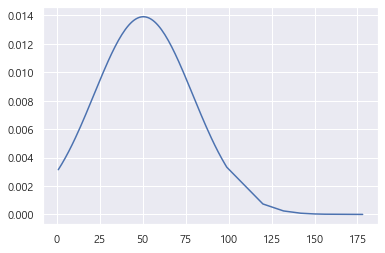

In [33]:
ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(ol_data),
         ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data), ol_pdf)

1.770455321661379e-17
0.9999999999999999


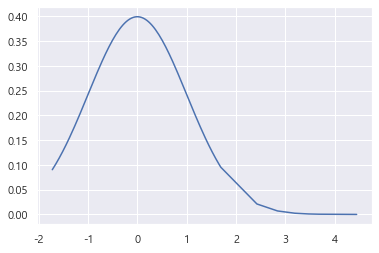

In [34]:
ol_std_list = []

for i in ol_data:
    z = (i - ol_data_mean) / ol_data_std
    ol_std_list.append(z)
    
ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

3) Z값의 2가 넘어가는 데이터 삭제

In [35]:
len(ol_std_list)

3010

In [36]:
for i in ol_std_list : 
    z = i 
    if z > 2 :
        ol_std_list.remove(z)
    if z < 2 :
        ol_std_list.remove(z)

len(ol_std_list)

1505

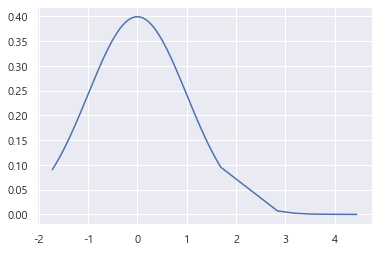

In [37]:
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

# 3. 사분위수 범위로 이상값 정제

1) 이상값 데이터 생성

In [38]:
boxdata = pd.DataFrame(np.random.randn(100, 3), columns = ["A열", "B열", "C열"])

In [39]:
boxdata.head()

,A열,B열,C열
0,0.119254,1.636752,1.369689
1,0.080606,0.425815,0.680374
2,-0.662644,-0.145169,-0.754508
3,-0.127069,-0.580282,0.972075
4,0.766298,-0.084074,-0.234381


2) 이상값 데이터 확인

In [40]:
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,0.126968,-0.210731,0.151433
std,0.969448,1.019869,0.953553
min,-2.729527,-3.354799,-2.057103
25%,-0.440122,-0.841273,-0.486013
50%,0.118961,-0.181899,0.048772
75%,0.773737,0.421277,0.848101
max,3.250283,2.091260,2.512495


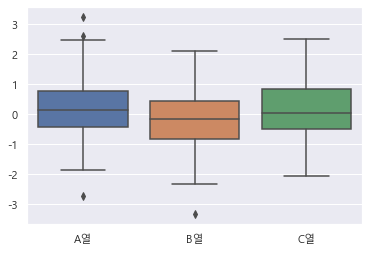

In [41]:
sns.boxplot(data = boxdata)
plt.show()

2) 이상값 확인

In [42]:
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][(df[column]<lowest)|(df[column]>highest)].index
    return outlier_idx

In [43]:
outlier_idx = get_outlier(df=boxdata, column='B열', weight=1.5)

In [44]:
outlier_idx

Int64Index([69], dtype='int64')

In [45]:
boxdata.drop(outlier_idx, axis=0, inplace=True)
boxdata.shape

(99, 3)

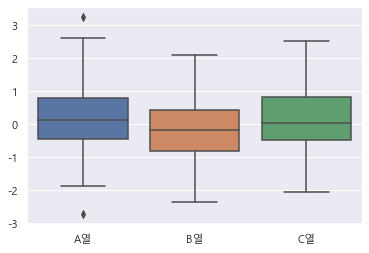

In [49]:
sns.boxplot(data=boxdata)
plt.show()